# Outliers

Autor: Sergio Diaz Paredes

Contacto: [Linkedin](https://www.linkedin.com/in/sergio-diaz-paredes/)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt

## Data

In [ ]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


- carat: Peso del diamante en quilates.
- cut: Calidad del corte del diamante (Fair, Good, Very Good, Premium, Ideal).
- color: Color del diamante, desde J (peor) hasta D (mejor).
- clarity: Claridad del diamante (I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF), donde:
  - I1: Inclusión 1
  -SI2: Inclusión pequeña 2
  -SI1: Inclusión pequeña 1
  -VS2: Inclusión muy pequeña 2
  -VS1: Inclusión muy pequeña 1
  -VVS2: Inclusión muy muy pequeña 2
  -VVS1: Inclusión muy muy pequeña 1
  -IF: Internamente impecable (sin inclusiones visibles bajo un microscopio de 10x).
-depth: Profundidad total en porcentaje (profundidad total = z / mean(x, y), donde x, y son las dimensiones en la parte superior del diamante y z es la profundidad).
- table: Ancho de la parte superior del diamante en relación con el punto más ancho.
- price: Precio en dólares estadounidenses.
- x: Longitud en mm.
- y: Anchura en mm.
- z: Profundidad en mm.

## Analisis exploratorio

In [ ]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


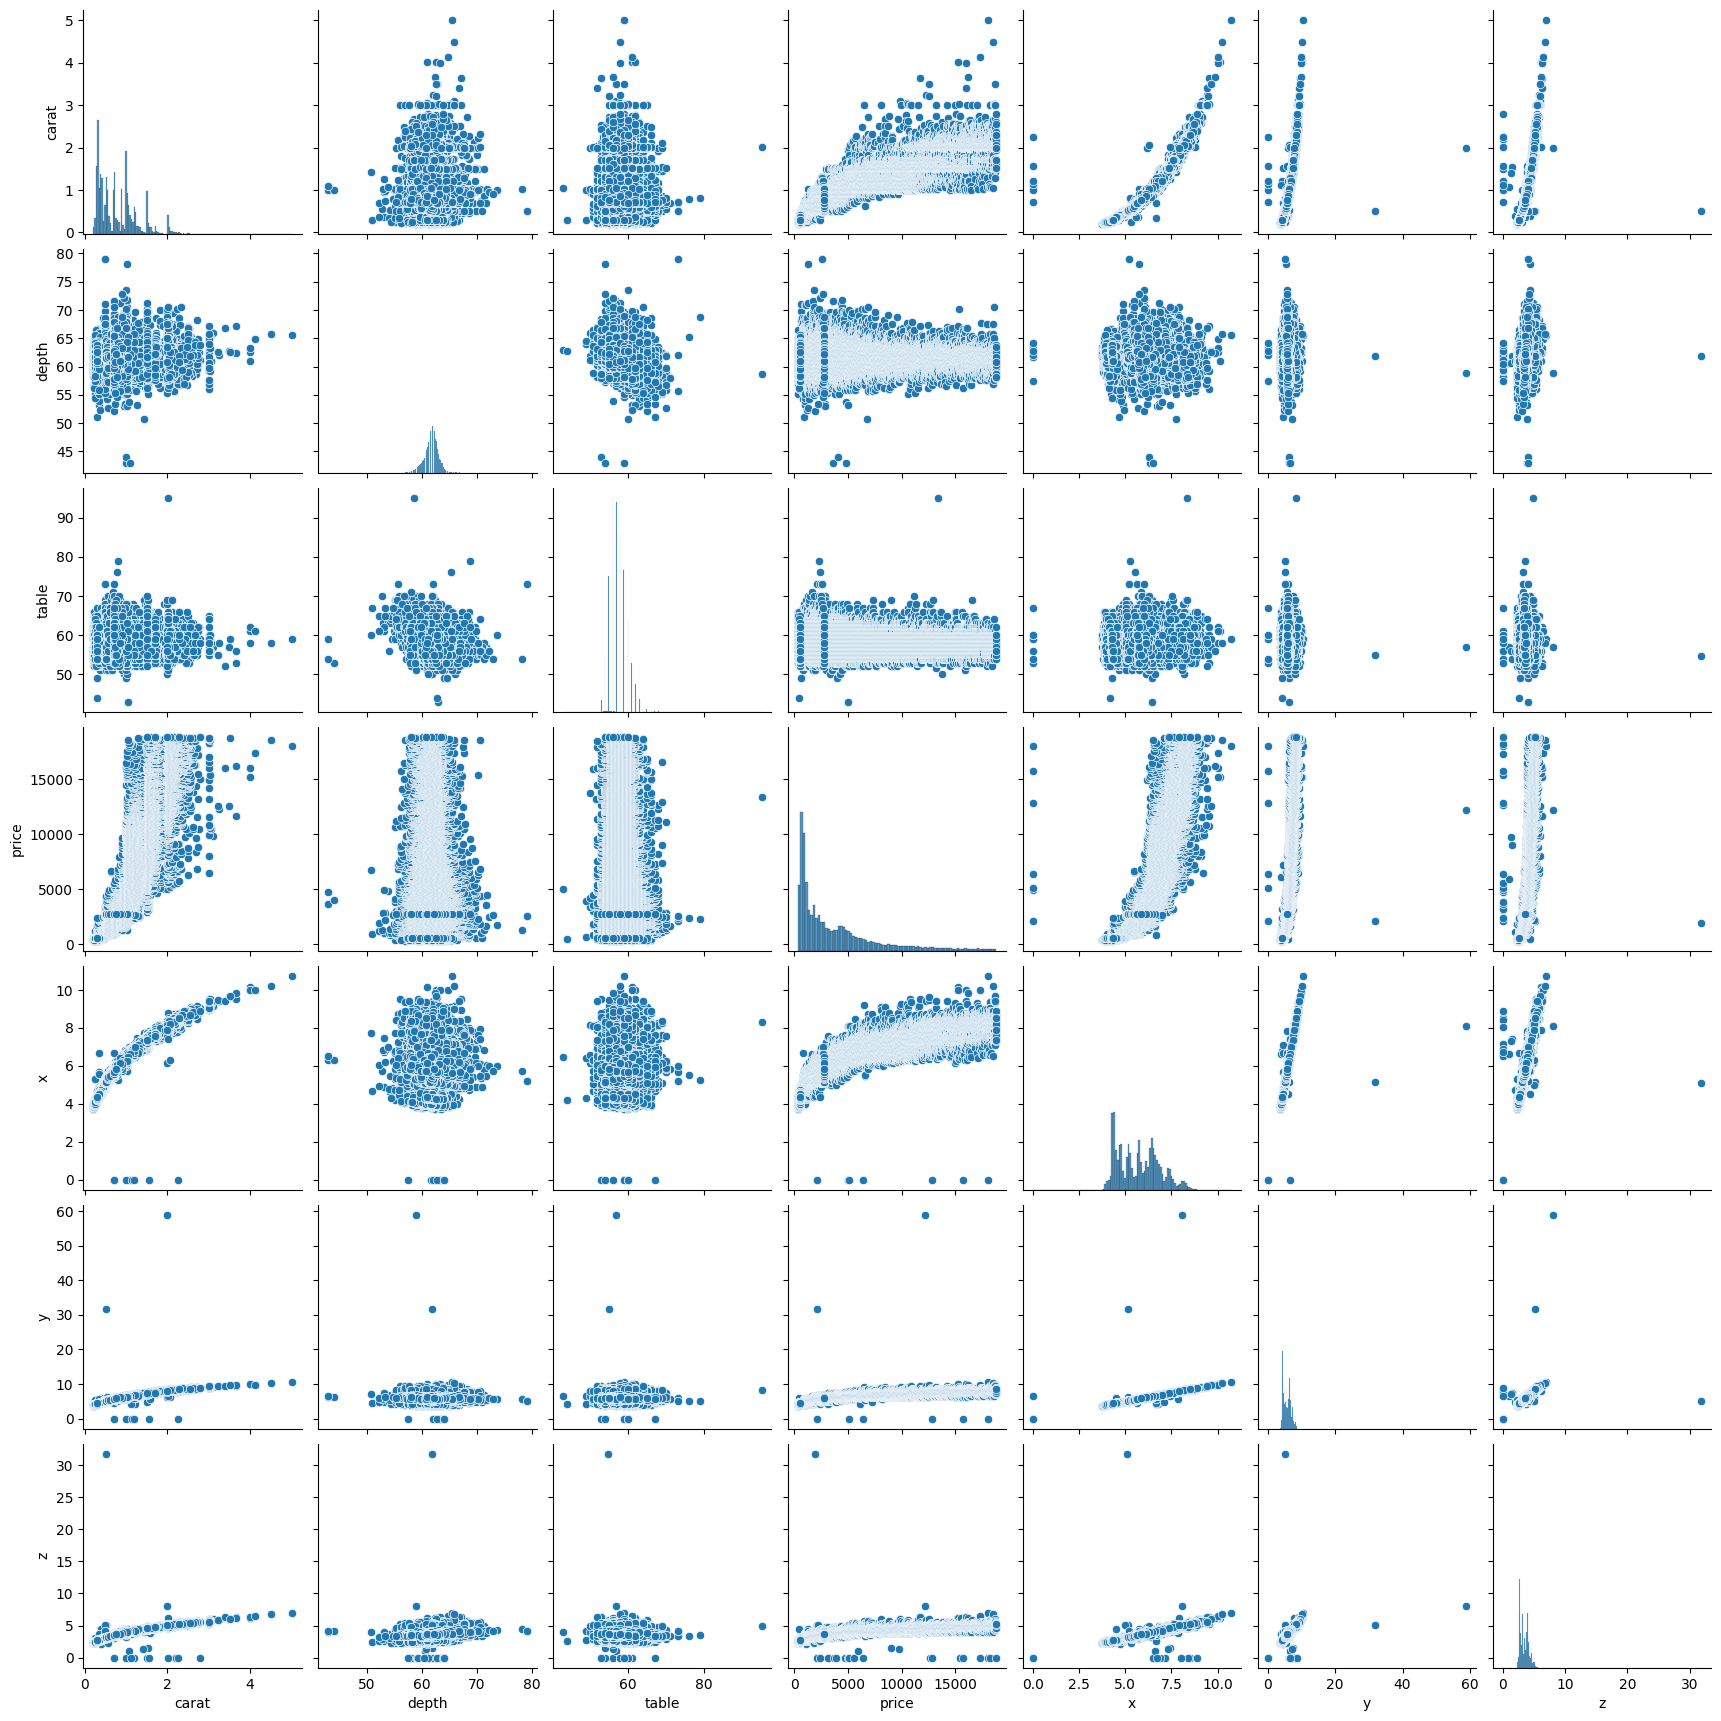

In [ ]:
sns.pairplot(diamonds)

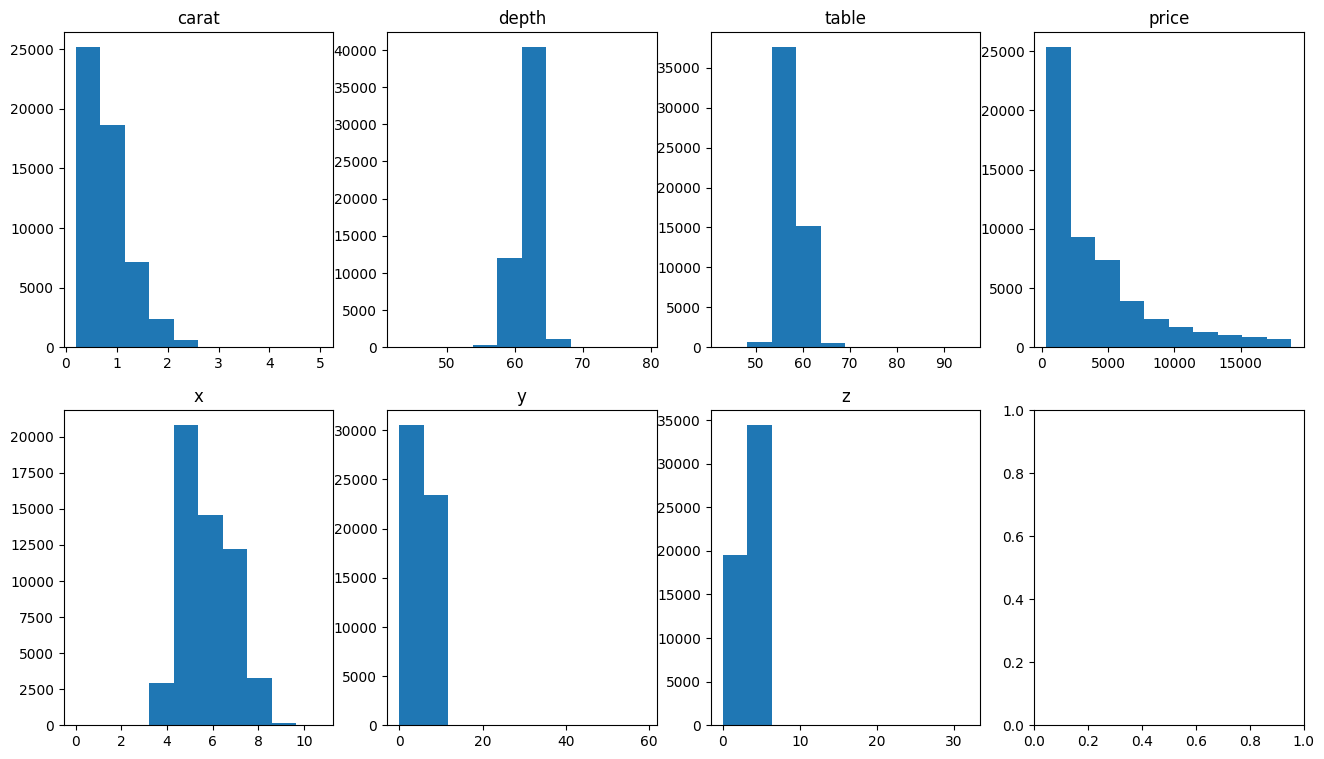

In [ ]:
vars = diamonds.select_dtypes('number').columns
fig, ax = plt.subplots(2,4,figsize=(16,9))
i = 0
for r in range(2):
  for c in range(4):
    if i <= (len(vars)-1):
      ax[r,c].hist(diamonds[vars[i]])
      ax[r,c].set_title(f"{vars[i]}")
      i += 1
fig.show()

## Outlier univariado

### Rango intercuartilico

<Axes: xlabel='depth'>

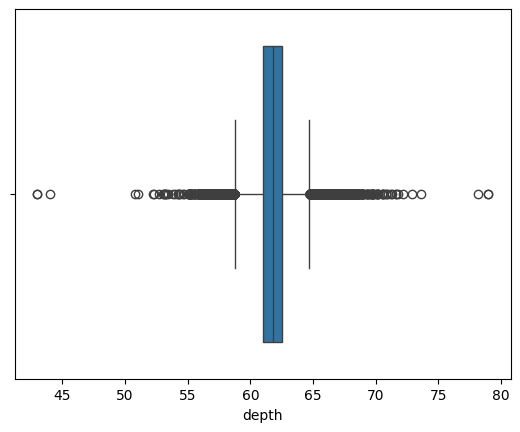

In [ ]:
sns.boxplot(diamonds,x='depth')

#### Identificando cuartiles

In [ ]:
Q1, Q3 = diamonds.depth.quantile([0.25,0.75])

#### Rango intercuartilico

In [ ]:
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [ ]:
lower,upper

(58.75, 64.75)

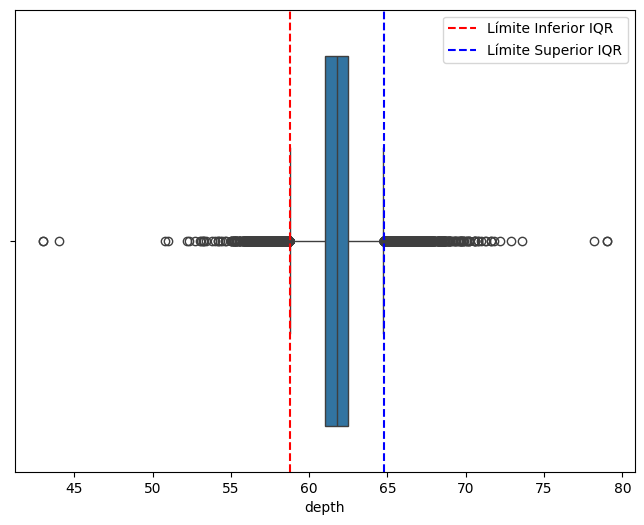

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='depth', data=diamonds)

plt.axvline(x=lower, color='red', linestyle='--', label='Límite Inferior IQR')
plt.axvline(x=upper, color='blue', linestyle='--', label='Límite Superior IQR')

plt.legend()
plt.show()

#### ¿Cuantos valores atipicos hay?

In [ ]:
diamonds.query(" depth < @lower or depth > @upper ")

,carat,cut,color,clarity,depth,table,price,x,y,z
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
24,0.31,Very Good,J,SI1,58.1,62.0,353,4.44,4.47,2.59
35,0.23,Good,F,VS1,58.2,59.0,402,4.06,4.08,2.37
42,0.26,Good,D,VS2,65.2,56.0,403,3.99,4.02,2.61
...,...,...,...,...,...,...,...,...,...,...
53882,0.71,Fair,D,VS1,65.4,59.0,2747,5.62,5.58,3.66
53886,0.70,Good,D,VS2,58.0,62.0,2749,5.78,5.87,3.38
53890,0.73,Good,E,SI1,57.9,55.0,2749,6.00,5.96,3.46
53895,0.70,Good,F,VS1,57.8,61.0,2751,5.83,5.79,3.36


<Axes: xlabel='depth'>

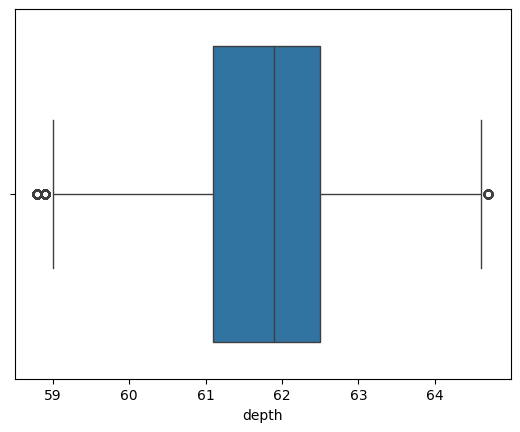

In [ ]:
#caja si eliminariamos los actuales atipicos
sns.boxplot(x='depth', data=diamonds.query(" depth >= @lower and depth <= @upper "))

#### Corrección

In [ ]:
diamonds['depth_clear'] = diamonds['depth'].clip(lower=lower, upper=upper)

In [ ]:
pd.melt(diamonds[['depth','depth_clear']])

,variable,value
0,depth,61.5
1,depth,59.8
2,depth,56.9
3,depth,62.4
4,depth,63.3
...,...,...
107875,depth_clear,60.8
107876,depth_clear,63.1
107877,depth_clear,62.8
107878,depth_clear,61.0


<Axes: xlabel='value', ylabel='variable'>

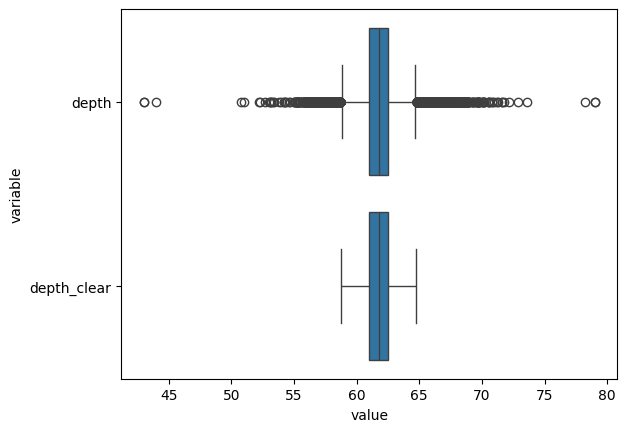

In [ ]:
sns.boxplot(data=pd.melt(diamonds[['depth','depth_clear']]),y='variable', x='value')

<Axes: xlabel='depth_clear'>

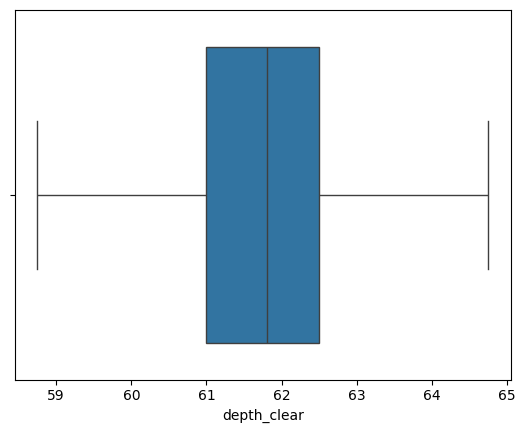

In [ ]:
sns.boxplot(diamonds,x='depth_clear')

In [ ]:
diamonds['depth_log'] = np.log(diamonds['depth'])

<Axes: xlabel='depth_log'>

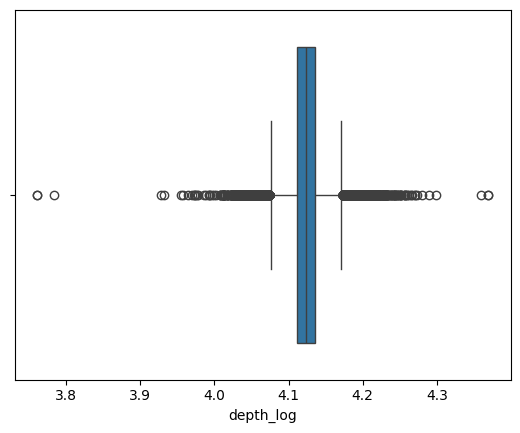

In [ ]:
sns.boxplot(diamonds,x='depth_log')

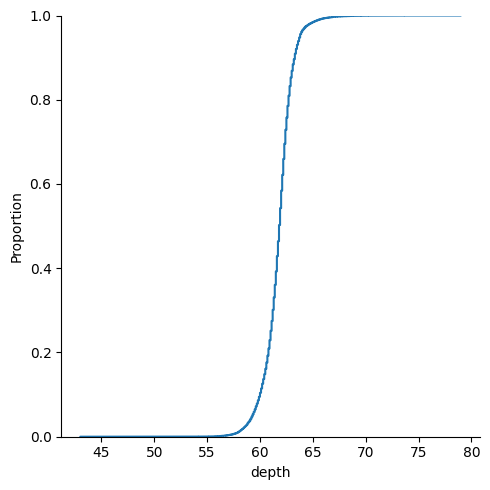

In [ ]:
sns.displot(diamonds,x='depth',kind='ecdf')

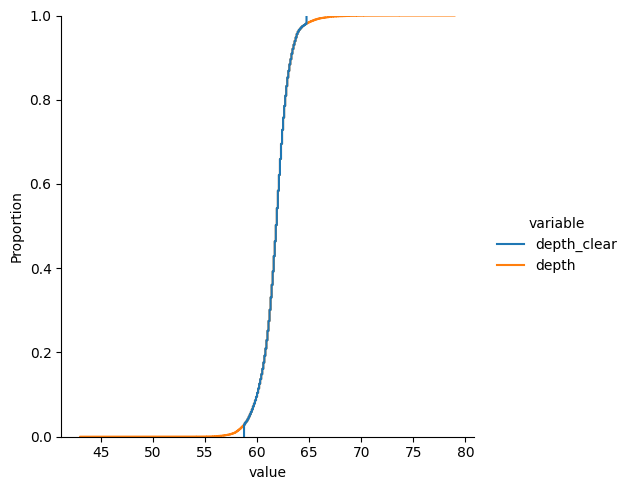

In [ ]:
sns.displot(pd.melt(diamonds[['depth_clear','depth']]),x='value',hue='variable',kind='ecdf')

#### Analizando la variable carat

<Axes: xlabel='carat'>

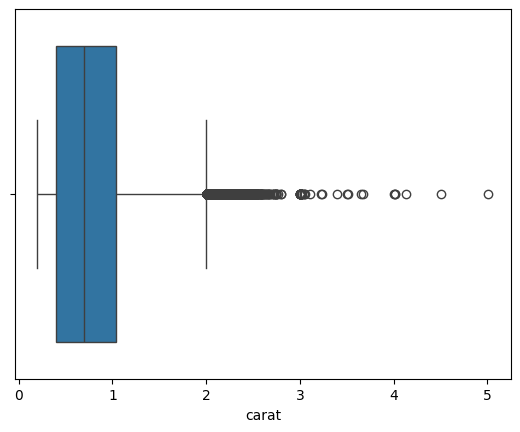

In [ ]:
sns.boxplot(diamonds,x='carat')

In [ ]:
Q1, Q3 = diamonds.carat.quantile([0.25,0.75])

In [ ]:
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

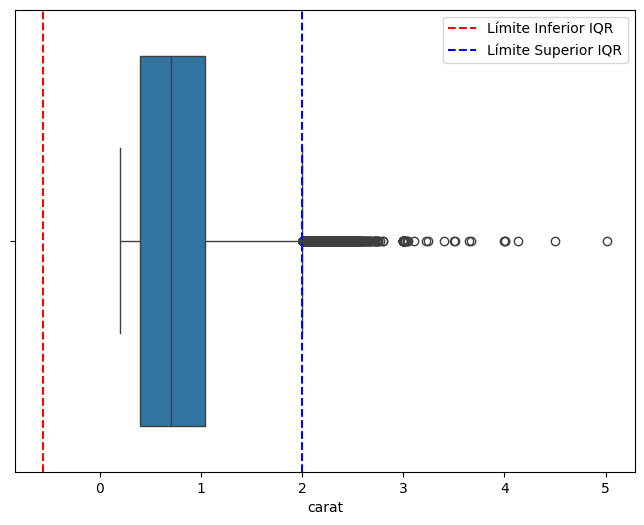

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='carat', data=diamonds)

plt.axvline(x=lower, color='red', linestyle='--', label='Límite Inferior IQR')
plt.axvline(x=upper, color='blue', linestyle='--', label='Límite Superior IQR')

plt.legend()
plt.show()

In [ ]:
diamonds.query(" carat < @lower or carat > @upper ")

,carat,cut,color,clarity,depth,table,price,x,y,z,depth_clear,depth_log
12246,2.06,Premium,J,I1,61.2,58.0,5203,8.10,8.07,4.95,61.20,4.114147
13002,2.14,Fair,J,I1,69.4,57.0,5405,7.74,7.70,5.36,64.75,4.239887
13118,2.15,Fair,J,I1,65.5,57.0,5430,8.01,7.95,5.23,64.75,4.182050
13757,2.22,Fair,J,I1,66.7,56.0,5607,8.04,8.02,5.36,64.75,4.200205
13991,2.01,Fair,I,I1,67.4,58.0,5696,7.71,7.64,5.17,64.75,4.210645
...,...,...,...,...,...,...,...,...,...,...,...,...
27741,2.15,Ideal,G,SI2,62.6,54.0,18791,8.29,8.35,5.21,62.60,4.136765
27742,2.04,Premium,H,SI1,58.1,60.0,18795,8.37,8.28,4.84,58.75,4.062166
27744,2.29,Premium,I,SI1,61.8,59.0,18797,8.52,8.45,5.24,61.80,4.123903
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11,62.50,4.135167


In [ ]:
diamonds['carat_clear'] = diamonds['carat'].clip(lower=lower, upper=upper)

<Axes: xlabel='value', ylabel='variable'>

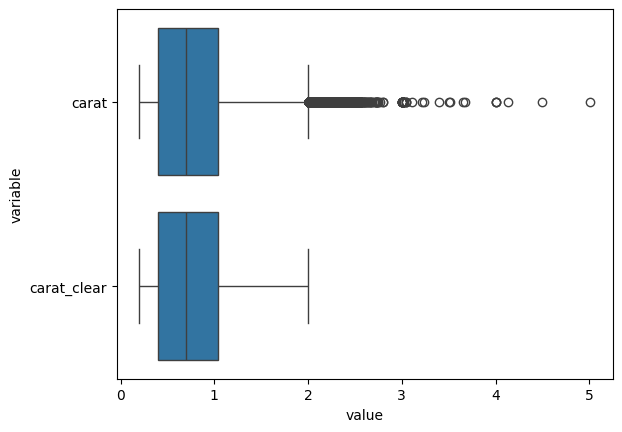

In [ ]:
sns.boxplot(data=pd.melt(diamonds[['carat','carat_clear']]),y='variable', x='value')

<Axes: xlabel='carat_clear'>

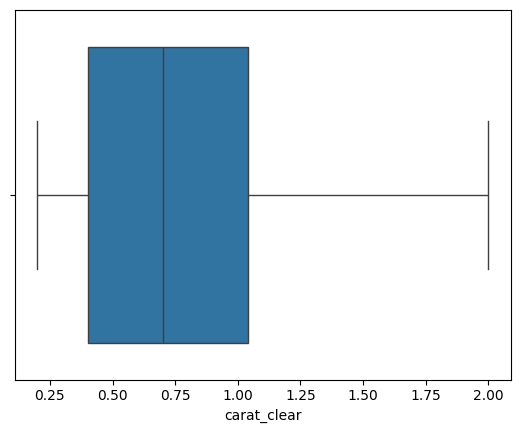

In [ ]:
sns.boxplot(diamonds,x='carat_clear')

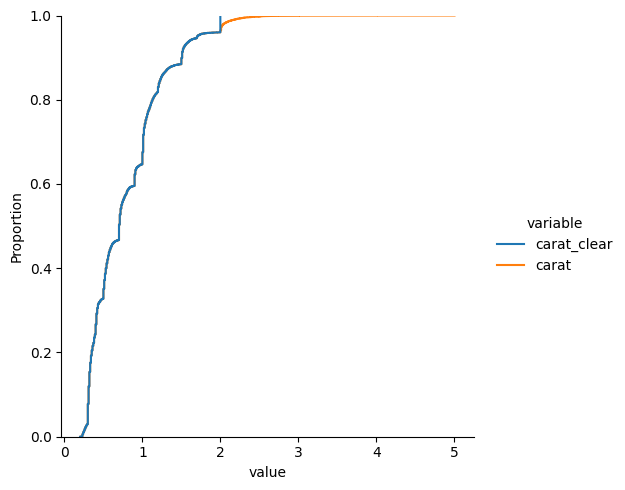

In [ ]:
sns.displot(pd.melt(diamonds[['carat_clear','carat']]),x='value',hue='variable',kind='ecdf')

In [ ]:
diamonds['carat_log'] = np.log(diamonds['carat'])

<Axes: xlabel='carat_log'>

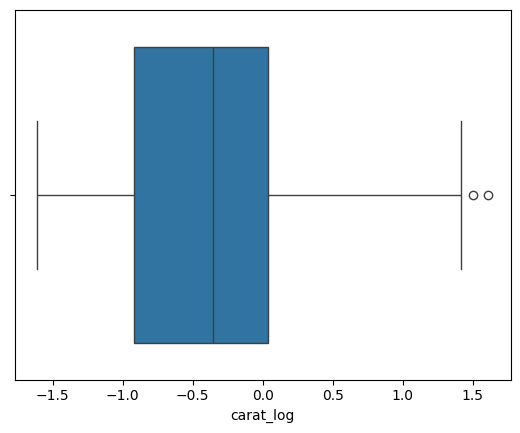

In [ ]:
sns.boxplot(diamonds,x='carat_log')

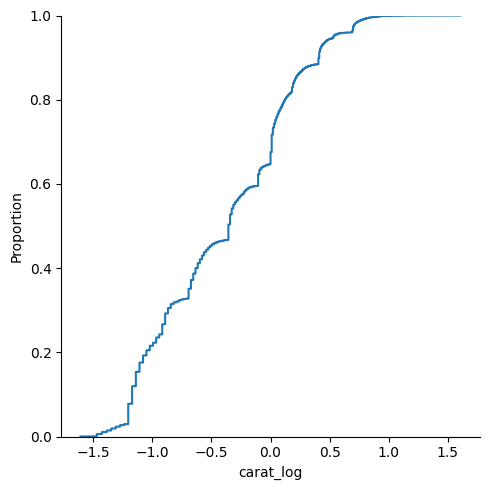

In [ ]:
sns.displot(diamonds,x='carat_log',kind='ecdf')

### Metodo de z-score

In [ ]:
from scipy.stats import zscore

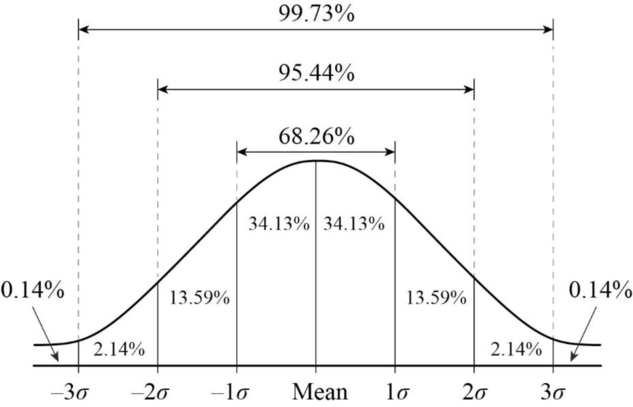

#### Analizando distribución

In [ ]:
diamonds[['table']].describe().T

,count,mean,std,min,25%,50%,75%,max
table,53940.0,57.457184,2.234491,43.0,56.0,57.0,59.0,95.0


In [ ]:
mean_,std_ = diamonds.table.mean(), diamonds.table.std()

In [ ]:
zi, zf = (mean_ - 3*std_, mean_ + 3*std_)

In [ ]:
outliers = len(diamonds.query(" (table < @zi) | (table >= @zf) "))

In [ ]:
(outliers / len(diamonds))*100

0.6229143492769744

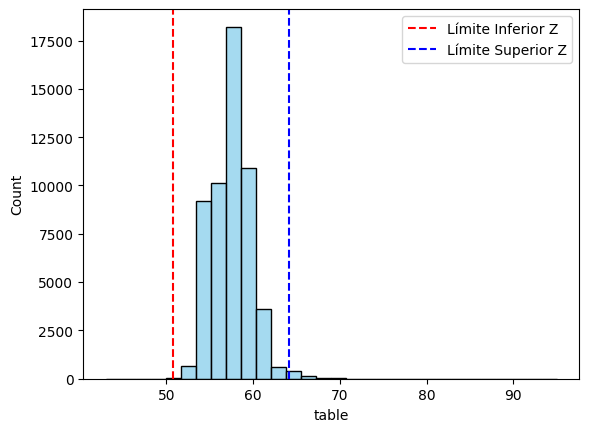

In [ ]:
sns.histplot(data=diamonds, x='table', bins=30, kde=False, color='skyblue')
plt.axvline(x=zi, color='red', linestyle='--', label='Límite Inferior Z')
plt.axvline(x=zf, color='blue', linestyle='--', label='Límite Superior Z')

plt.legend()
plt.show()

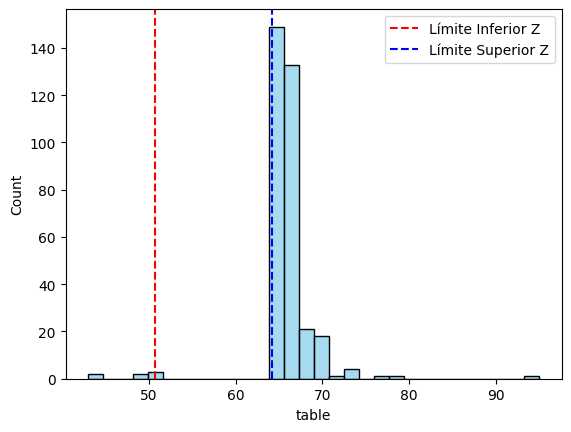

In [ ]:
sns.histplot(data=diamonds.query(" table < @zi or table >@zf "), x='table', bins=30, kde=False, color='skyblue')
plt.axvline(x=zi, color='red', linestyle='--', label='Límite Inferior Z')
plt.axvline(x=zf, color='blue', linestyle='--', label='Límite Superior Z')

plt.legend()
plt.show()

#### Calculando el z score

In [ ]:
diamonds['table_z'] = zscore(diamonds['table'])
diamonds[['table','table_z']].head()

,table,table_z
0,55.0,-1.099672
1,61.0,1.585529
2,65.0,3.375663
3,58.0,0.242928
4,58.0,0.242928


<Axes: xlabel='table_z', ylabel='Count'>

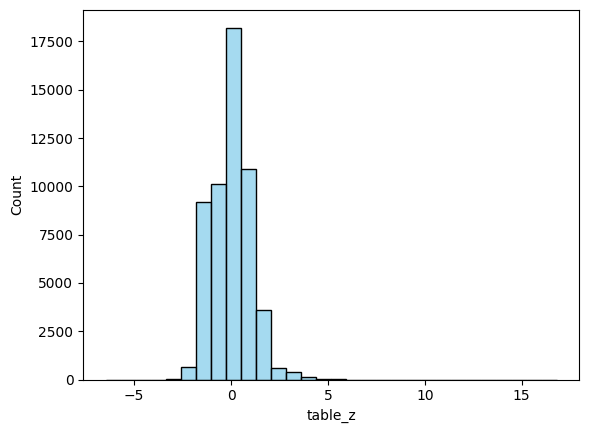

In [ ]:
sns.histplot(data=diamonds, x='table_z', bins=30, kde=False, color='skyblue')

#### Corrieccion

In [ ]:
mean_original = diamonds['table'].mean()
std_original = diamonds['table'].std()

In [ ]:
z_lower = -3
z_upper = 3

lower = mean_original + z_lower * std_original
upper = mean_original + z_upper * std_original

In [ ]:
diamonds['table_clear'] = diamonds['table'].clip(lower=lower, upper=upper)

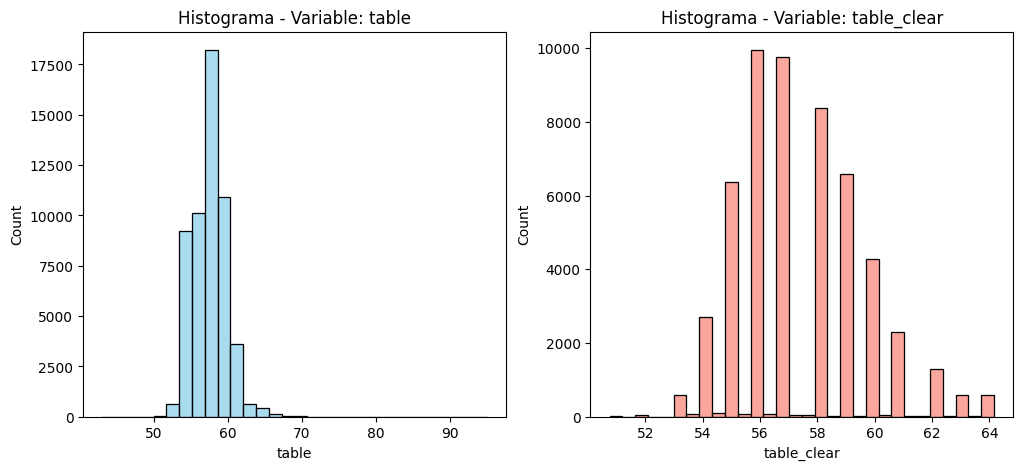

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.histplot(data=diamonds, x='table', bins=30, kde=False, color='skyblue', alpha=0.7, ax=axes[0])
axes[0].set_title('Histograma - Variable: table')

sns.histplot(data=diamonds, x='table_clear', bins=30, kde=False, color='salmon', alpha=0.7, ax=axes[1])
axes[1].set_title('Histograma - Variable: table_clear')

plt.show()

In [ ]:
diamonds['table_clear2'] = diamonds['table_clear'].round(0).astype(int)

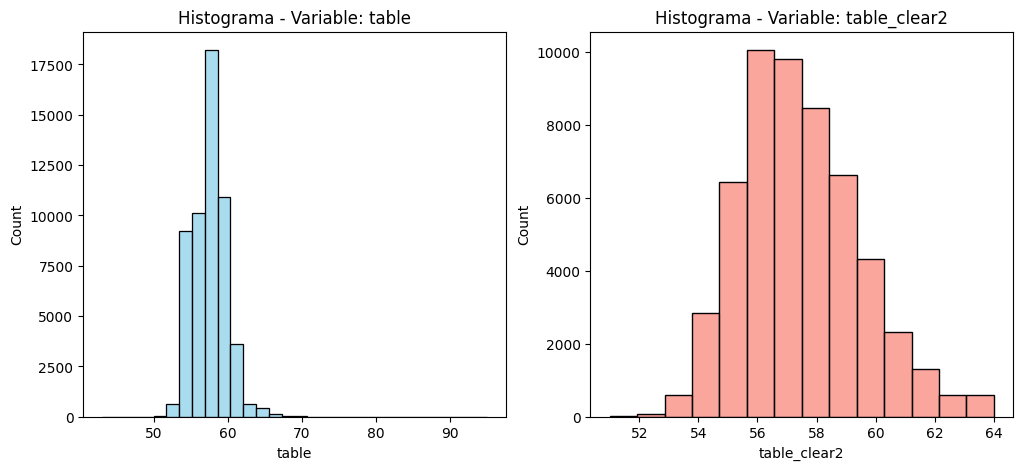

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.histplot(data=diamonds, x='table', bins=30, kde=False, color='skyblue', alpha=0.7, ax=axes[0])
axes[0].set_title('Histograma - Variable: table')

sns.histplot(data=diamonds, x='table_clear2', bins=diamonds['table_clear2'].nunique(), kde=False, color='salmon', alpha=0.7, ax=axes[1])
axes[1].set_title('Histograma - Variable: table_clear2')

plt.show()

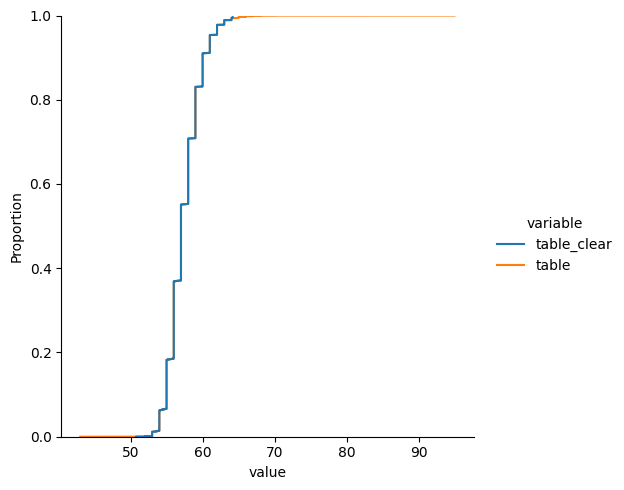

In [ ]:
sns.displot(pd.melt(diamonds[['table_clear','table']]),x='value',hue='variable',kind='ecdf')

## Outlier multivariado

### Identificacion por error en relacion

#### Relacion entre variables

<Axes: xlabel='carat', ylabel='x'>

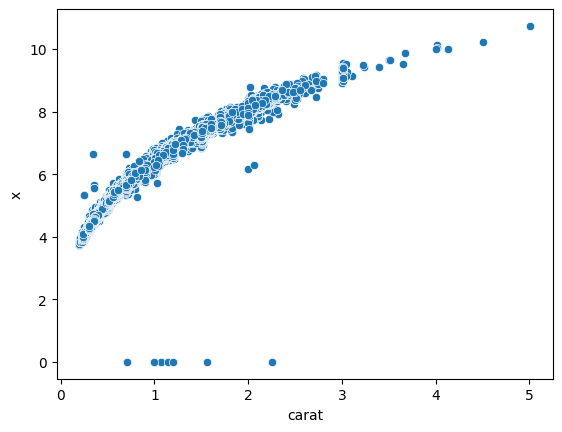

In [ ]:
sns.scatterplot(diamonds,x='carat',y='x')

#### Ajuste polinomial

In [ ]:
grado = 1
coeficientes = np.polyfit(diamonds['carat_clear'], diamonds['x'], grado)
diamonds['linea'] = np.polyval(coeficientes, diamonds['carat_clear'])

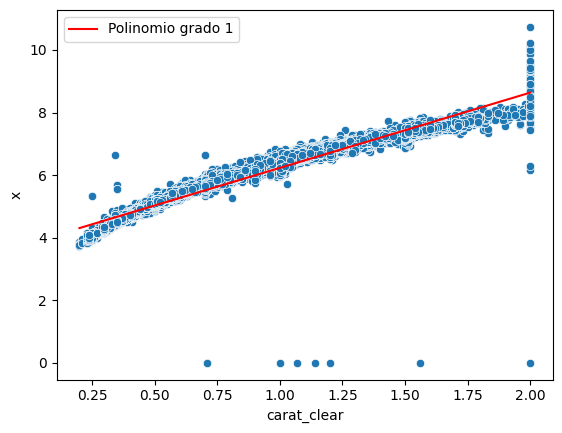

In [ ]:
sns.scatterplot(diamonds,x='carat_clear',y='x')
plt.plot(diamonds.sort_values('carat_clear')['carat_clear'], diamonds.sort_values('carat_clear')['linea'], color='red', label=f'Polinomio grado {grado}')
plt.legend()

<Axes: xlabel='out_linea', ylabel='Count'>

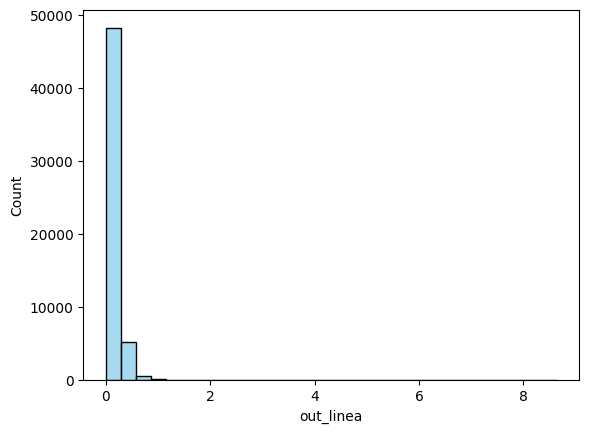

In [ ]:
diamonds['out_linea'] = np.abs(diamonds['x'] - diamonds['linea'])
sns.histplot(data=diamonds, x='out_linea', bins=30, kde=False, color='skyblue')

<Axes: xlabel='carat_clear', ylabel='x'>

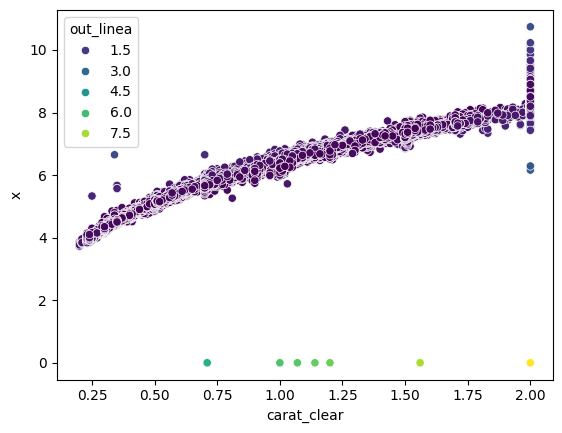

In [ ]:
sns.scatterplot(diamonds,x='carat_clear',y='x',hue='out_linea',palette='viridis')

### Identificacion por densidad

In [ ]:
from sklearn.neighbors import KernelDensity
from sklearn.covariance import EllipticEnvelope

##### Visualizando la disperción

<Axes: xlabel='depth', ylabel='table'>

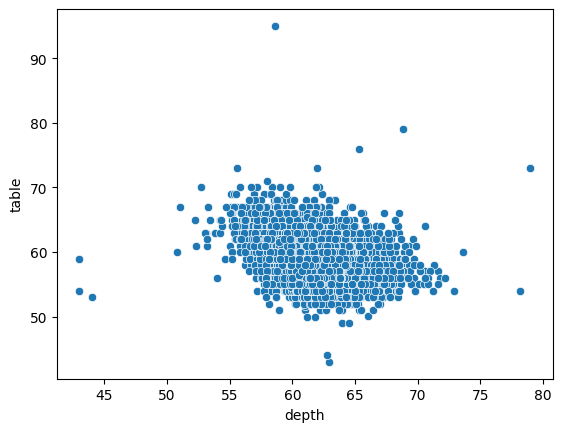

In [ ]:
sns.scatterplot(diamonds,x='depth',y='table')

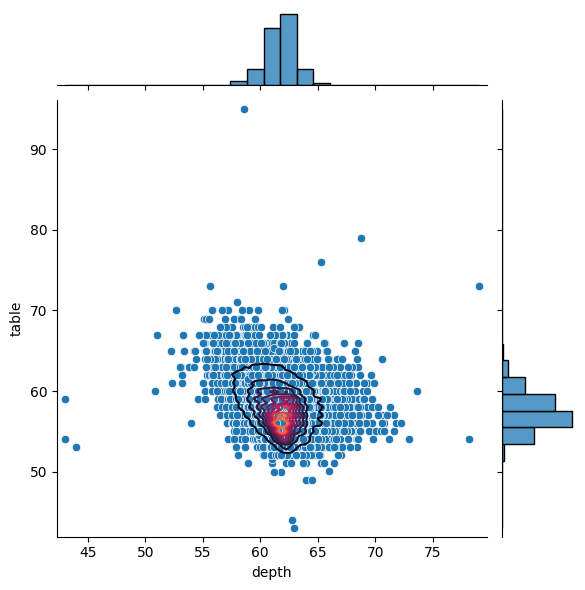

In [ ]:
sns.JointGrid(data=diamonds, y= "table",x="depth").plot_joint(sns.kdeplot,fill=False,cmap="rocket").plot_joint(sns.scatterplot).plot_marginals(sns.histplot,bins=25)

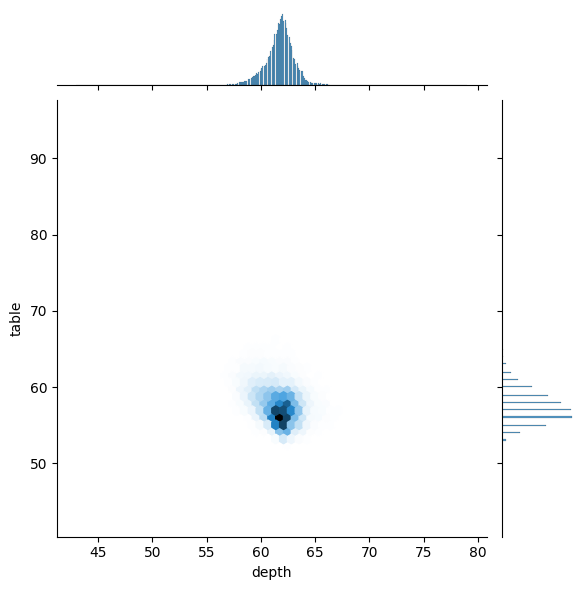

In [ ]:
sns.jointplot(data=diamonds, y= "table",x="depth",kind='hex')

##### Calculando la densidad

In [ ]:
kde = KernelDensity(bandwidth=0.5, metric='euclidean', kernel='gaussian', algorithm='auto')
kde.fit(diamonds[['depth','table']])

#diamonds['kde'] = np.exp(kde.score_samples(X))

KernelDensity(bandwidth=0.5)

In [ ]:
diamonds['kde'] = kde.score_samples(diamonds[['depth','table']])

<Axes: xlabel='depth', ylabel='table'>

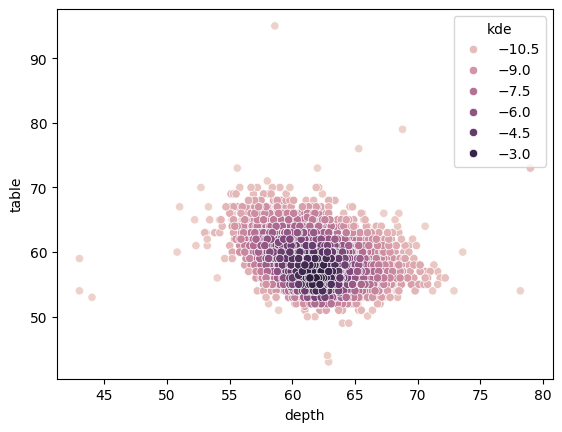

In [ ]:
sns.scatterplot(diamonds,x='depth',y='table',hue='kde')

<Axes: xlabel='kde', ylabel='Count'>

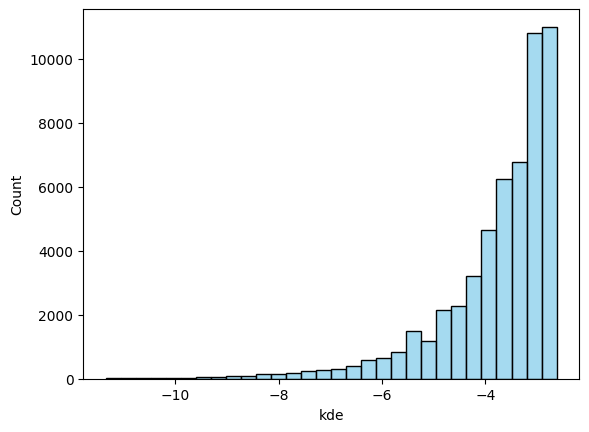

In [ ]:
sns.histplot(data=diamonds, x='kde', bins=30, kde=False, color='skyblue')

<Axes: xlabel='depth', ylabel='table'>

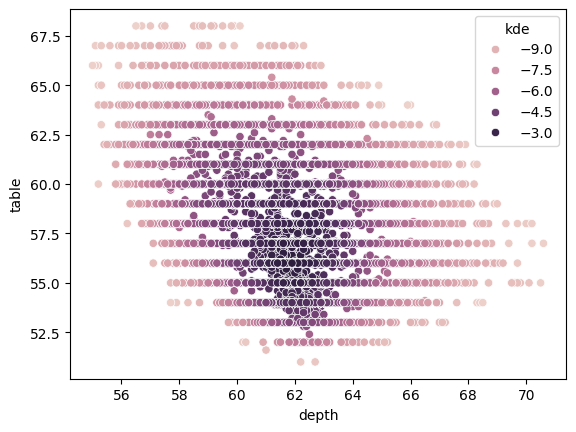

In [ ]:
sns.scatterplot(diamonds.query(" kde > -10 "),x='depth',y='table',hue='kde')

In [ ]:
diamonds['kde2'] = np.exp(diamonds['kde'])

<Axes: xlabel='kde2', ylabel='Count'>

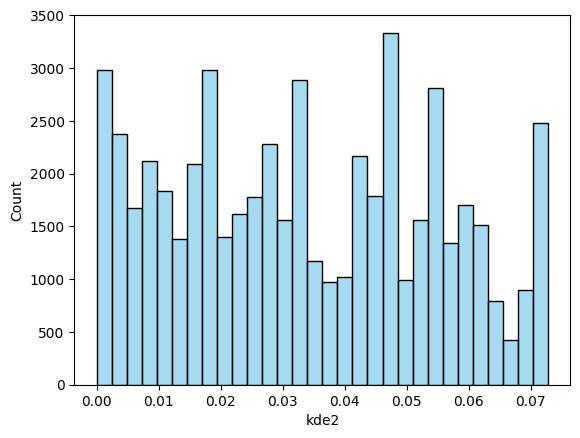

In [ ]:
sns.histplot(data=diamonds, x='kde2', bins=30, kde=False, color='skyblue')

<Axes: xlabel='depth', ylabel='table'>

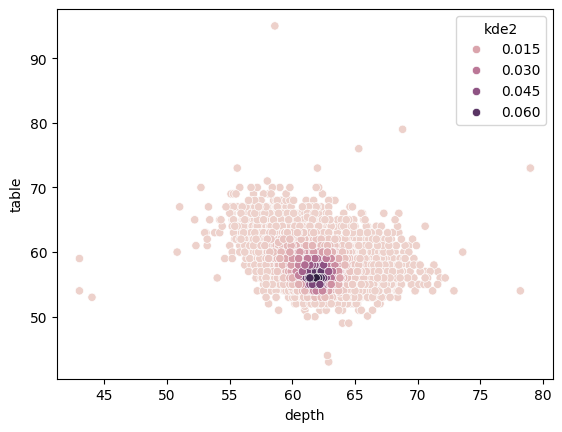

In [ ]:
sns.scatterplot(diamonds,x='depth',y='table',hue='kde2')